<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/MNIST_resnet_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow.contrib as tf_contrib
import numpy as np
from keras.datasets import mnist

from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

In [0]:
((train_x, train_y), (valid_x, valid_y)) = mnist.load_data()

In [40]:
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [0]:
def show_img(img, title=""):
    plt.imshow(img, cmap="gray")
    plt.title(title)

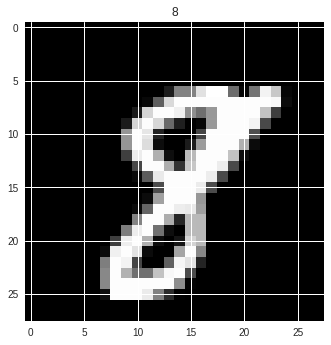

In [14]:
show_img(train_x[55], train_y[55])

In [0]:
def normalize(X_train, X_test):

  mean = np.mean(X_train, axis=(0, 1, 2, 3))
  std = np.std(X_train, axis=(0, 1, 2, 3))

  X_train = (X_train - mean) / std
  X_test = (X_test - mean) / std

  return (X_train, X_test)

In [0]:
train_x = np.expand_dims(train_x, axis=-1)
valid_x = np.expand_dims(valid_x, axis=-1)

In [0]:
(train_x, valid_x) = normalize(train_x, valid_x)

Resnet block: </br>

- with identity mappings bn - relu - conv - bn - relu - conv
- I have to tune # of block
- I have to tune # of filters per channel, but it must be pow of 2 [2, 4, 8, 16]

In [0]:
def resnet_block(x_init, filters, block_number=0):
  with tf.variable_scope('block_' + block_number):
  
    x = x_init
  
    x = tf.layers.batch_normalization(x, scope='bn_0_0')
    x = tf.nn.relu(x, scope='relu_0_0')
    x = tf.layers.conv2d(x, scope='conv_0_0')
        
    x = tf.layers.batch_normalization(x, scope='bn_1_0')
    x = tf.nn.relu(x, scope='relu_1_0')
    x = tf.layers.conv2d(x, scope='conv_1_0')
    
    return x + x_init

In [0]:
??tf.layers

In [0]:
?tf.nn.softmax

In [0]:
n_features = 10
filters = 32
blocks = [2, 2, 2, 2]

In [0]:
def global_avg_pooling(x):
    gap = tf.reduce_mean(x, axis=[1, 2], keepdims=True)
    return gap

In [0]:
for i in range(blocks[0]):
  with tf.variable_scope('layer_0'):
    x = resnet_block(, filters, i)

for i in range(blocks[1]):
  with tf.variable_scope('layer_1'):
    x = resnet_block(, filters*2, i)
    
for i in range(blocks[2]):
  with tf.variable_scope('layer_2'):
    x = resnet_block(, filters*4, i)    
    
for i in range(blocks[3]):
  with tf.variable_scope('layer_3'):
    x = resnet_block(, filters*8, i)   

with tf.variable_scope('final'):
  x = global_avg_pooling(x)
  x = tf.layers.flatten(x)
  logist = tf.nn.softmax(x)

print(logist)
    